In [2]:
#Importing tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from matplotlib.ticker import StrMethodFormatter
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Importing CSV's
TMDBmovies = pd.read_csv("../../zippedData/tmdb.movies.csv.gz")
Movie_budget = pd.read_csv("../../zippedData/tn.movie_budgets.csv.gz")
Movie_gross = pd.read_csv("../../zippedData/bom.movie_gross.csv.gz")
Movie_info = pd.read_csv('../../zippedData/rt.movie_info.tsv.gz', sep='\t')
reviews = pd.read_csv('../../zippedData/rt.reviews.tsv.gz', sep='\t', encoding='iso8859_2' )

In [4]:
#First Step: Find total revenue by adding foreign and domestic gross together. 
#This will allow us to see which movies and which genres generated the most money
Movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
Movie_gross = Movie_gross.dropna()

In [6]:
Movie_gross['foreign_gross'] = Movie_gross['foreign_gross'].str.replace(",","")

In [7]:
MV = Movie_gross['foreign_gross'].astype(float)

In [8]:
MV

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3275      1500000.0
3286       229000.0
3309       256000.0
3342         5200.0
3353        30000.0
Name: foreign_gross, Length: 2007, dtype: float64

In [9]:
Movie_gross['total_rev'] = MV + Movie_gross['domestic_gross']

In [10]:
Movie_gross['total_rev'] = Movie_gross['total_rev'].sort_values(ascending = False)

In [11]:
Movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_rev
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018,9.840000e+04


In [12]:
Movie_gross = Movie_gross.reset_index()
Movie_gross

,index,title,studio,domestic_gross,foreign_gross,year,total_rev
0,0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...,...
2002,3275,I Still See You,LGF,1400.0,1500000,2018,1.501400e+06
2003,3286,The Catcher Was a Spy,IFC,725000.0,229000,2018,9.540000e+05
2004,3309,Time Freak,Grindstone,10000.0,256000,2018,2.660000e+05
2005,3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018,9.840000e+04


In [13]:
#We now have the total revenue each movie made, and it is listed greatest to least
#The next thing we did was find which genres the top movies were in TMDBmovies
MVG_dict = {'28' : 'Action', '12' :'Adventure', '16' : "Animation", '10751' : "Family", '35' : "Comedy", '80' : "Crime", '99' : "Documentary", 
           "18" : "Drama", "14" : "Fantasy", "36" : "History", '27' : "Horror", '10402' : "Music", '9648' : "Mystery", '10749' : "Romance",
           '878' : "Scifi", '10770' : "TV Movie", '53' : "Thriller", '10752' : "Western", '37' : "War"}

In [14]:
TMDBmovies['genre_ids'] = TMDBmovies['genre_ids'].str.replace("[","").str.replace("]","").str.replace(",","").str.split(" ")

In [15]:
TMDEXPLODE = TMDBmovies.explode('genre_ids')

In [16]:
#We now know how many times each genre id appears in the database. For instance, drama (18) appears 8303 times
TMDEXPLODE['genre_ids'].value_counts()

18       8303
35       5652
99       4965
53       4207
27       3683
28       2612
         2479
10749    2321
878      1762
10751    1565
80       1515
16       1486
12       1400
10402    1267
9648     1237
14       1139
10770    1084
36        622
10752     330
37        205
Name: genre_ids, dtype: int64

In [17]:
#Here, we merged TMDBmovies and Movie_gross to compare genre ids and total revenue 
new_table = TMDBmovies.merge(Movie_gross)

In [18]:
new_table = new_table.drop(columns=['id','original_language','original_title','popularity','release_date','title','vote_average','vote_count','studio','domestic_gross','foreign_gross','year'])


In [19]:
new_table = new_table.drop('index', axis = 1)

In [20]:
new_table

,Unnamed: 0,genre_ids,total_rev
0,1,"[14, 12, 16, 10751]",4.949000e+08
1,2,"[12, 28, 878]",6.239000e+08
2,4,"[28, 878, 12]",8.283000e+08
3,7,"[16, 10751, 35]",1.067000e+09
4,8,"[16, 10751, 35]",5.431000e+08
...,...,...,...
1696,24335,"[12, 80, 10751, 35]",3.920000e+07
1697,24465,"[35, 10749, 18, 9648]",8.284700e+07
1698,24494,"[12, 35, 14]",3.617060e+08
1699,24646,"[18, 10749]",3.300000e+06


In [24]:
#Many movies are listed as multiple genres. We have to explode this column.
#However, first we need to clean up that column!
new_table['genre_ids'] = new_table['genre_ids'].str.replace("[","").str.replace("]","").str.replace(",","").str.split(" ")

In [25]:
new_table = new_table.explode('genre_ids')

In [26]:
new_table

,Unnamed: 0,genre_ids,total_rev
0,1,14,494900000.0
0,1,12,494900000.0
0,1,16,494900000.0
0,1,10751,494900000.0
1,2,12,623900000.0
...,...,...,...
1699,24646,18,3300000.0
1699,24646,10749,3300000.0
1700,25148,28,2191000.0
1700,25148,12,2191000.0


In [27]:
new_table['genre_ids'] = new_table["genre_ids"].map(MVG_dict)

In [28]:
new_table.dropna(subset= ['genre_ids'])

,Unnamed: 0,genre_ids,total_rev
0,1,Fantasy,494900000.0
0,1,Adventure,494900000.0
0,1,Animation,494900000.0
0,1,Family,494900000.0
1,2,Adventure,623900000.0
...,...,...,...
1699,24646,Drama,3300000.0
1699,24646,Romance,3300000.0
1700,25148,Action,2191000.0
1700,25148,Adventure,2191000.0


In [29]:
#Now we can find the average amount of money each genre generated
use_this = new_table.groupby('genre_ids')['total_rev'].mean().sort_values(ascending=True)
use_this

genre_ids
Documentary    3.410941e+07
History        7.056081e+07
Romance        7.257466e+07
Drama          7.736281e+07
Music          8.334165e+07
Mystery        8.935239e+07
Horror         9.210092e+07
Crime          1.047328e+08
Thriller       1.111222e+08
TV Movie       1.209500e+08
Western        1.384082e+08
Comedy         1.410837e+08
War            1.589017e+08
Action         2.654744e+08
Family         2.855180e+08
Fantasy        3.094006e+08
Scifi          3.127972e+08
Animation      3.417592e+08
Adventure      3.697909e+08
Name: total_rev, dtype: float64

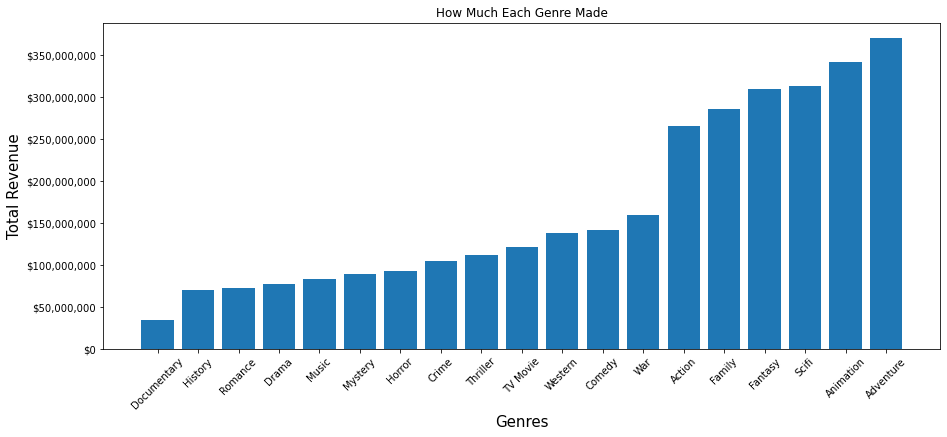

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))

y = use_this
x = use_this.index

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

ax.bar(x, y)
ax.set_title('How Much Each Genre Made')
ax.tick_params(axis="x", labelsize = 10)
ax.set_xlabel("Genres", fontsize = 15)
ax.set_ylabel("Total Revenue", fontsize = 15)
plt.xticks(rotation = 45);

In [31]:
#According to our graph, animation and adventure movies make the most money.
#The next we thing we looked at was which studios generated the most revenue.
#This would be useful for Microsoft if they wanted to partner with or model one of the top companies

In [32]:
studios = Movie_gross.groupby('studio')['total_rev'].mean().sort_values(ascending=True)[30:45]

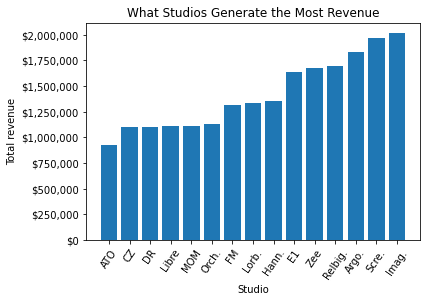

In [33]:
fig, ax = plt.subplots()
ax.bar(studios.index, studios)

plt.xticks(rotation=55)

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.set_xlabel('Studio')
ax.set_ylabel('Total revenue');
ax.set_title("What Studios Generate the Most Revenue");

In [34]:
#The last thing we looked at was how runtime impacts movie profitability. 
info = Movie_info.drop(columns=['id','synopsis','rating','genre','director','writer','theater_date','dvd_date','currency'])

In [35]:
info['box_office'] = info['box_office'].fillna('0')

In [36]:
#got rid of ","
info['box_office'] = info['box_office'].str.replace(',','')

In [37]:
#made all the values of this column integers
info['box_office'] = info['box_office'].astype('int64')

In [38]:
info = info.sort_values('box_office', ascending=False)

In [39]:
info['runtime'] = info['runtime'].str.replace(' minutes',' ')

In [40]:
info.dropna(subset=['runtime'], inplace=True)

In [44]:
info['runtime'] = info['runtime'].astype('int64')

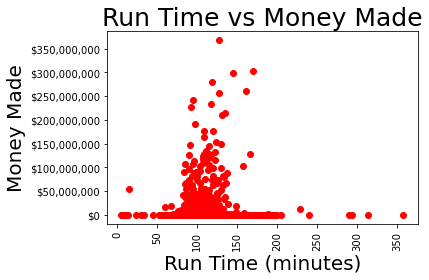

In [45]:
fig, ax = plt.subplots()

# These are all arguments that go in the plot's function
ax.scatter(info['runtime'], info['box_office'],
           c='red')

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

ax.set_xlabel('Run Time (minutes)', fontsize=20)
ax.set_ylabel('Money Made', fontsize=20)
ax.set_title('Run Time vs Money Made', fontsize=25)
plt.xticks(rotation=90)

plt.tight_layout()